# Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-03-31 02:12:16.863102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 02:12:16.863466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [2]:
#plotting settings
plot_params= {
    'figure.figsize': (8,6),
    'axes.labelsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'grid.linestyle':'--',
    'axes.grid.which': 'both',
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.major.size': 7,
    'xtick.minor.size': 3,
    'ytick.major.size': 7,
    'ytick.minor.size': 3,
    'axes.titlesize': 20,
    'xtick.major.size':5,
    'ytick.major.size':5,
    'xtick.major.pad':10,
    'ytick.major.pad':5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    
}
plt.rcParams.update(plot_params)

In [3]:
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06}

In [36]:
zmin=0.005 
zmax=5.
y_dict={'output':'dydz,tSZ_1h',

        # mass function/pressure profile/concentration prescriptions 
        'mass function' : 'T10',
        'hm_consistency': 0,             
        'pressure profile': 'B12',
        'P0_B12': 11,
        'concentration parameter': 'B13',

        #P(k) settings for mass function
        'k_per_decade_class_sz':80.,
        'k_min_for_pk_class_sz':1e-4,
        'k_max_for_pk_class_sz':7.,

        #integration precision settings
        'redshift_epsrel': 1e-4,
        'redshift_epsabs': 1e-100,
        'mass_epsrel':1e-4,
        'mass_epsabs':1e-100,

        #redshift and mass bounds
        'z_min' : zmin,
        'z_max' : zmax,
        'M_min' : 1e10,
        'M_max' : 1e16,

        "ell_min" : 2,
        "ell_max" : 20000,
        'dell': 0,
        'dlogell': 0.2,
        # pressure profile params:

        'delta for electron pressure':'200c',
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        # 'n_k_pressure_profile' : 80,
        'use_fft_for_profiles_transform': 1,
        'x_min_gas_pressure_fftw' : 1e-4,
        'x_max_gas_pressure_fftw' : 1e2,
        'N_samp_fftw' : 1024,

        'x_outSZ': 4.,
        'truncate_wrt_rvir': 0,
        # 'pressure_profile_epsrel':1e-4,
        # 'pressure_profile_epsabs':1e-100
       }

In [37]:
%%time
M = Class()
M.set(cosmo_params)
M.set(y_dict)
M.compute_class_szfast()

dydz=np.vectorize(M.get_dydz_at_z)
dydzdlnm = np.vectorize(M.get_dydzdlnm_at_z_and_m)

CPU times: user 4.8 s, sys: 160 ms, total: 4.96 s
Wall time: 830 ms


In [6]:
z_s_y = np.linspace(0.005,3.,1000)
# dydz = dy_dz_at_zs(z_s_y)
norm_y = np.trapz(dydz(z_s_y),z_s_y)
print(f"mean y: {norm_y}")


mean y: 8.774660997296731e-07


(0.0, 3.0)

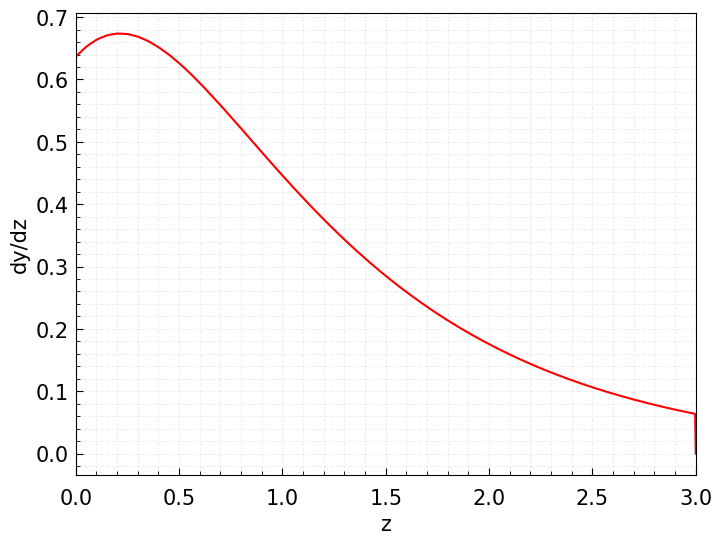

In [7]:
plt.plot(z_s_y, dydz(z_s_y)/norm_y, color='red', label=r'dy/dz')
plt.xlabel('z')
plt.ylabel('dy/dz')
plt.xlim([0,3])
# plt.savefig("figures/dydz.pdf")

In [8]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
# cl_yy_2h = np.asarray(M.cl_sz()['2h'])

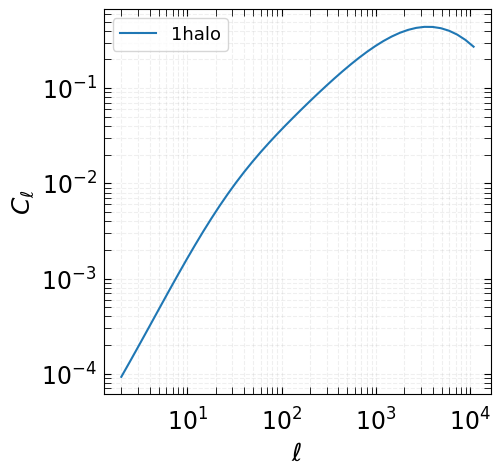

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
# ax.plot(l,cl_yy_2h,label='2halo')
# ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# mean y differential

In [10]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e15),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm)
        ilq+=1
    izp+=1

/Users/boris/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: divide by zero encountered in get_dydzdlnm_at_z_and_m (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 2.46 s, sys: 12.2 ms, total: 2.48 s
Wall time: 2.69 s


Text(0.5, 1.0, 'Monopole $\\ell = 0$')

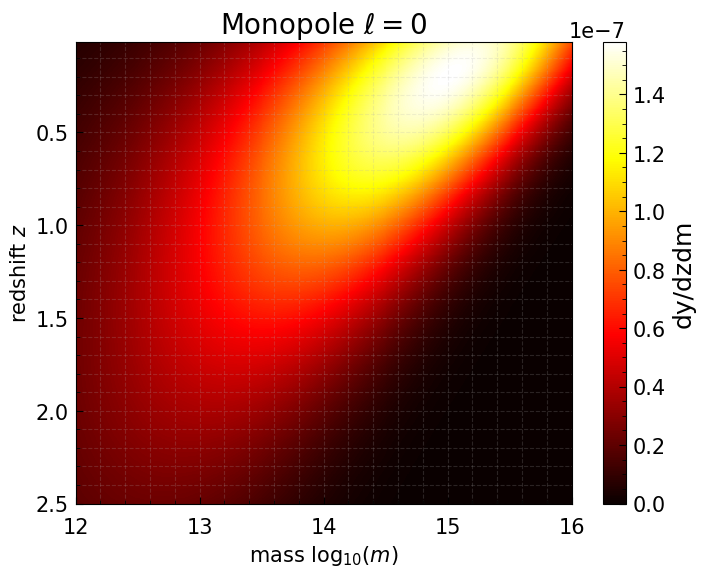

In [11]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                # norm=colors.LogNorm(vmin=kappa_2d.min(), vmax=kappa_2d.max()),
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('Monopole $\ell = 0$')
# plt.savefig('figures/dydzdlnm_heatmap.pdf')

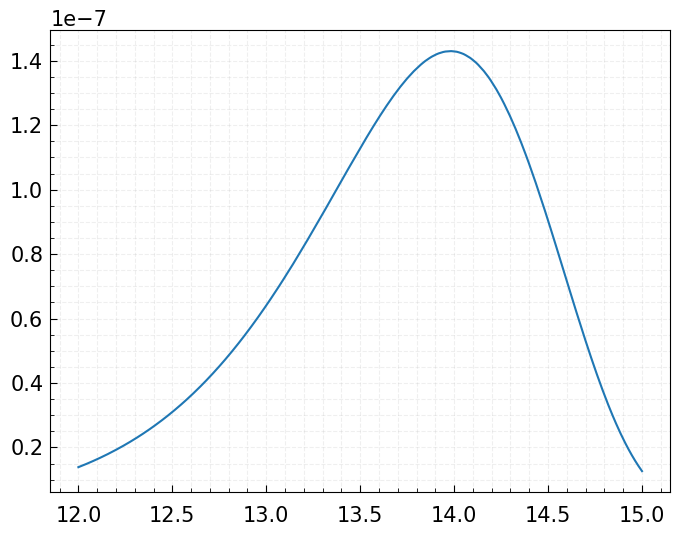

In [13]:
# plot one slice:
izp = 100
plt.plot(log10m_array,dydzdm_2d[izp])

# l=500 differential

In [14]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e15),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm,l=500)
        ilq+=1
    izp+=1

CPU times: user 2.82 s, sys: 7.88 ms, total: 2.83 s
Wall time: 2.83 s


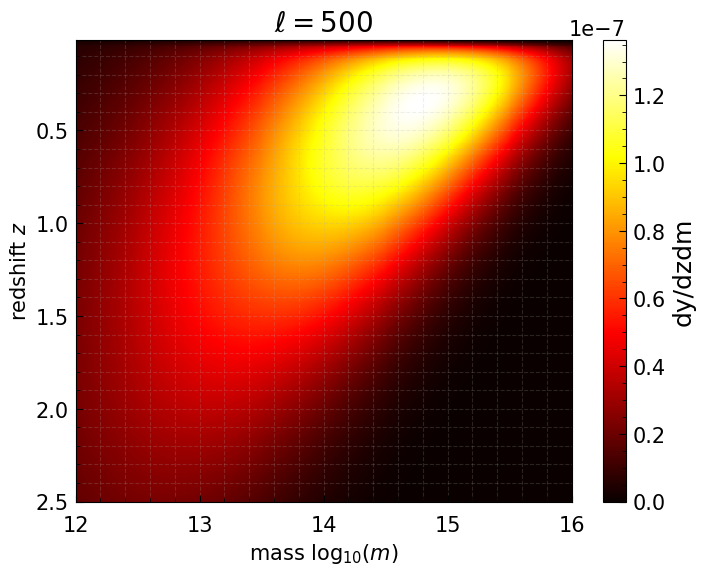

In [15]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('$\ell = 500$')
plt.savefig('figures/dy500dzdlnm_heatmap.pdf')

# l=10000 differential

In [16]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e15),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm,l=10000)
        ilq+=1
    izp+=1

CPU times: user 2.89 s, sys: 7.92 ms, total: 2.9 s
Wall time: 2.9 s


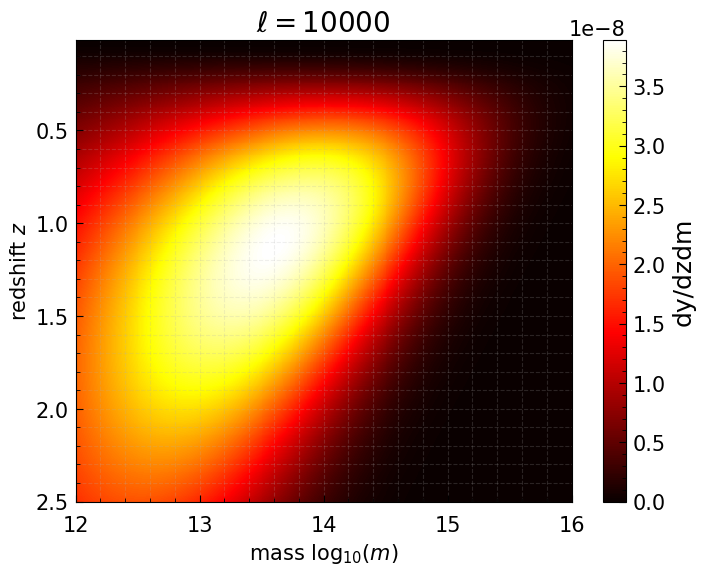

In [ ]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('$\ell = 10000$')
plt.savefig('figures/dy10000dzdlnm_heatmap.pdf')

# sz kernel for many $\ell$'s

In [39]:
%%time
# l=10000
la = np.geomspace(1e2,2e4,200)
for il,l in enumerate(la):
    z_array_2d = np.linspace(0.01,5,300)
    log10m_array = np.linspace(np.log10(1e10),np.log10(1e15),300)
    dydzdm_2d = np.zeros((300,300))
    izp = 0
    ilq = 0
    for zp in z_array_2d:
        ilq=0
        for lm in log10m_array:
            dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm,l=l)
            ilq+=1
        izp+=1
    fig = plt.figure()
    im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                    extent = [10,16,z_array_2d[-1],z_array_2d[0]],
                    # norm=colors.LogNorm(vmin=kappa_2d.min(), vmax=kappa_2d.max()),
                    aspect='auto')
    cbar = plt.colorbar(im) # adding the colobar on the right
    cbar.set_label('dy/dzdm',size=18)
    plt.xlabel('mass $\mathrm{log}_{10}(m/M_\mathrm{sun}h^{-1})$')
    plt.ylabel('redshift $z$')
    
    plt.title('$\ell = %.1f$'%l)
    plt.savefig('figures/ykernels_manyls/dydzdlnm_heatmap_%d.pdf'%il)
    # plt.show()
    plt.close()

CPU times: user 3min 53s, sys: 1.97 s, total: 3min 55s
Wall time: 3min 56s
